# Lab 3: Overbooking example

In Class 4, we have learned how to simulate the overbooking example using Crystal Ball. In this lab, we are going to repeat the simulation but using Python.

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np
import scipy as sp
import scipy.stats as st
import pickle as pkl
print ("Modules Imported!")

Modules Imported!


## Step 1: Deterministic Model for overbooking:

1 1 8050 550 7500


Text(0,0.5,'profit')

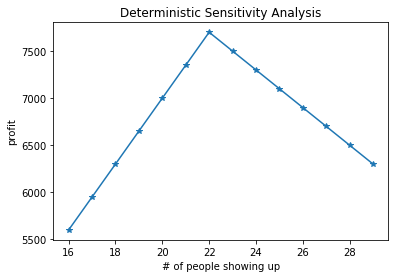

In [2]:
Seats = 22 # This is a global variable

Ticket_price=350 # We do not set this as a global variable because we may want to do sensitivity analysis on it
Bumping_cost=550 # We do not set this as a global variable because we may want to do sensitivity analysis on it

Tickets_to_sell=30   # we first assume to sell 30 tickets; later we will find the optimal # of tickets to sell

Prob_show=0.75
People_show_up= 23   # we assume 23 people to show up; later we will use binomial distribution to simulate # of people who show up.

def overbook(tprice, bumpcost, tsell, pshowup):
    bumpedpeople=max(pshowup-Seats,0)
    if bumpedpeople>0:
        bumpevent=1
    else:
        bumpevent=0
    revenue=tprice*pshowup
    cost=bumpcost*bumpedpeople
    profit=revenue-cost
    return profit, revenue, cost, bumpedpeople, bumpevent

Profit, Revenue, Cost, Bumped_people, Bump_event=overbook(Ticket_price, Bumping_cost, Tickets_to_sell, People_show_up)
print(Bumped_people,Bump_event,Revenue,Cost, Profit)

# Deterministic Sensitivity Analysis
People_show_up_vec = range(16,Tickets_to_sell)  #vary the # of people showing up from 16 to the # of tickets
Profit_vec_det = []      #store profits under different # of people showing up
for People_show_up in People_show_up_vec:
    Profit, Revenue, Cost, Bumped_people, Bump_event=overbook(Ticket_price, Bumping_cost, Tickets_to_sell, People_show_up)
    Profit_vec_det.append(Profit)
    
plt.plot(People_show_up_vec, Profit_vec_det, '*-')
plt.title('Deterministic Sensitivity Analysis')
plt.xlabel('# of people showing up')
plt.ylabel('profit')

## Step 2: Simulate # of people who show up using Binomial distribution

2 1 8400 1100 7300


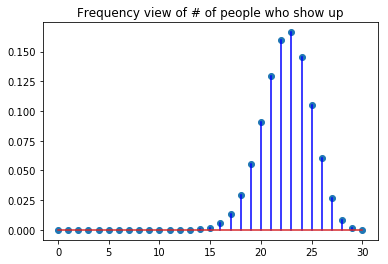

In [5]:
People_show_up=st.binom.rvs(Tickets_to_sell,Prob_show)
k = range(Tickets_to_sell+1)
plt.stem(k,st.binom.pmf(k,Tickets_to_sell,Prob_show), 'b', label = 'Binomial')
plt.title('Frequency view of # of people who show up')

Profit, Revenue, Cost, Bumped_people, Bump_event=overbook(Ticket_price, Bumping_cost, Tickets_to_sell, People_show_up)
print(Bumped_people,Bump_event,Revenue,Cost, Profit)

## Step 3: Run the simulation for many trials

Mean profit: 7214.905
Std profit: 405.02480291335246
Mena std error of profit: 4.050248029133525


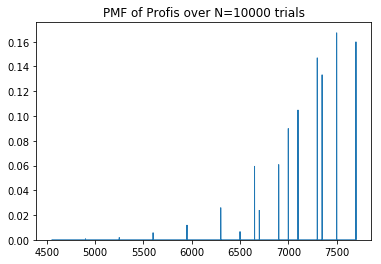

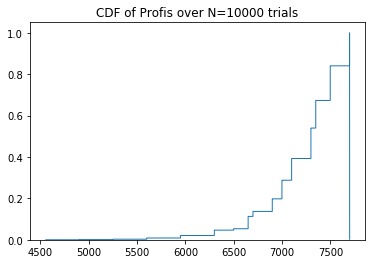

In [6]:
def ob_simulate(NumSim, probshow, tprice, bumpcost, tsell):
    peopleshowupvec=[]; # store the number of people who show up in N trials as a vector/list
    bumpedpeoplevec=[];
    revenuevec=[];
    costvec=[];
    profitvec=[];
    
    for n in range(1,NumSim+1): #Simulates over N independent trials
        people_showup=st.binom.rvs(tsell,probshow)
        profit, revenue, cost, bumpedpeople, bumpevent=overbook(tprice, bumpcost, tsell, people_showup)
        # overbook function defined in step 1
        
        peopleshowupvec.append(people_showup) #Appends the number of people who show up to the vector/list
        bumpedpeoplevec.append(bumpedpeople)
        revenuevec.append(revenue)
        costvec.append(cost)
        profitvec.append(profit)
    
    return peopleshowupvec, bumpedpeoplevec, revenuevec, costvec, profitvec

N=10000 # Total number of trials 
People_show_up_vec, Bumped_people_vec, Revenue_vec, Cost_vec, Profit_vec = \
    ob_simulate(N, Prob_show, Ticket_price, Bumping_cost, Tickets_to_sell)  # function defined above
numbins=max(Profit_vec)-min(Profit_vec)+1
plt.hist(Profit_vec, bins=numbins, density=True, histtype='step'); #Creates a histogram of profits over N independent trials
plt.title('PMF of Profis over N=%i trials' %N)
plt.figure()
plt.hist(Profit_vec, bins=numbins, density=True, cumulative=True, histtype='step')
plt.title('CDF of Profis over N=%i trials' %N)

print('Mean profit:', np.mean(Profit_vec))
print('Std profit:', np.std(Profit_vec))
print('Mena std error of profit:', np.std(Profit_vec)/np.sqrt(N))


## Step 4: Modeling Decisions (How many tickets to sell?)

range(22, 41, 2)
Mean profits: [5765.55 6334.8  6765.2  7078.65 7211.2  7132.3  6940.4  6697.15 6411.9
 6111.7 ] 

Std profits: [714.65774851 744.01206979 697.33346399 535.92600002 424.58751748
 395.16035985 426.47138239 485.20034779 524.04521751 556.08282656] 

Mena std error of profits: [22.59946233 23.52772747 22.05162035 16.94746817 13.42663621 12.49606778
 13.48620925 15.34338221 16.57176484 17.584883  ] 



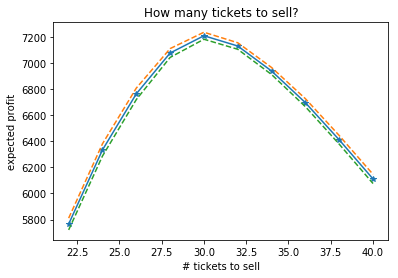

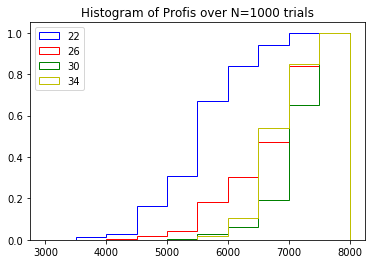

In [8]:
Tickets_to_sell_vec=range(22,40+1,2)  # Consider selling tickets ranging from 22, 24, 26 .., to 40
print(Tickets_to_sell_vec)

# store the number of people who show up in N trials for different # of tickets_to_sell as a two-dim vector/list
People_show_up_mat=[]; 
Bumped_people_mat=[];
Revenue_mat=[];
Cost_mat=[];
Profit_mat=[];
N = 1000;

for Tickets_to_sell in Tickets_to_sell_vec:
    # use the funciton defined above to simulate for each Tickets_to_sell
    People_show_up_vec, Bumped_people_vec, Revenue_vec, Cost_vec, Profit_vec = \
        ob_simulate(N, Prob_show, Ticket_price, Bumping_cost, Tickets_to_sell)

    # append vectors to form a matrix
    People_show_up_mat.append(People_show_up_vec)
    Bumped_people_mat.append(Bumped_people_vec);
    Revenue_mat.append(Revenue_vec);
    Cost_mat.append(Cost_vec);
    Profit_mat.append(Profit_vec);

Profit_mean = np.mean(Profit_mat,axis=1)
Profit_std = np.std(Profit_mat,axis=1)
Profit_mse = Profit_std/np.sqrt(N)
print('Mean profits:', Profit_mean,'\n') # print mean profits for different # of tickets_to_sell
print('Std profits:', Profit_std,'\n')
print('Mena std error of profits:', Profit_mse,'\n')

plt.figure()
plt.plot(Tickets_to_sell_vec, Profit_mean, '*-')
plt.title('How many tickets to sell?')
plt.xlabel('# tickets to sell')
plt.ylabel('expected profit')
plt.plot(Tickets_to_sell_vec, Profit_mean+2*Profit_mse, '--')
plt.plot(Tickets_to_sell_vec, Profit_mean-2*Profit_mse, '--')


plt.figure()
color_vec=['b','r','g','y']
for i in range(4):
    plt.hist(Profit_mat[2*i], range=(3000,8000), density=True, histtype='step', cumulative=True, label=str(Tickets_to_sell_vec[2*i]),color=color_vec[i]); 
plt.title('Histogram of Profis over N=%i trials' %N)
plt.legend(loc=2)




## Step 5: Utility Analysis

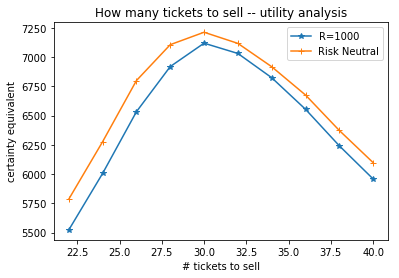

In [9]:
RT = 1000 # Risk tolerance
ProfitMA = np.asarray(Profit_mat)/RT
Utility_mat = 1-np.exp(-ProfitMA)  # Here the exp function is conducted component-wise for the whole array
EU_array = np.mean(Utility_mat,axis=1)
CE_array = -RT*np.log(1-EU_array)  # Similar to above, the log function is done component-wise for the whole array

plt.plot(Tickets_to_sell_vec, CE_array, '*-', label='R=1000')
plt.plot(Tickets_to_sell_vec, Profit_mean, '+-', label='Risk Neutral')
plt.title('How many tickets to sell -- utility analysis')
plt.xlabel('# tickets to sell')
plt.ylabel('certainty equivalent')
plt.legend()

## Step 6: Speeding up with Vectorization

Recall in Step 3, we need to use a loop of simulation to obtain the distribution of profit. However, instead of using a loop, we can use vectorization to speed up the whole process. Such advantage of vectorization over loop comes from the fact that CPU/ hardware these days can handle vector computation faster than loop.

Mean profit: 7208.815
Std profit: 409.95968798773373
Mena std error of profit: 1.2964063628932094
Probability of bumping people: 0.51477


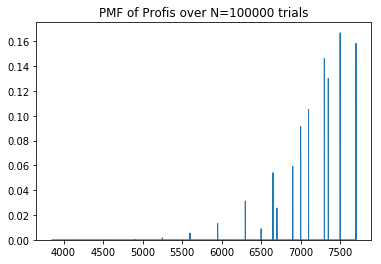

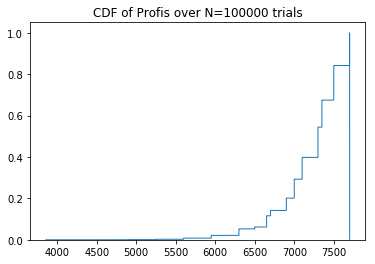

In [9]:
Tickets_to_sell=30 # If not setting it back, the value is 40, from the for loop in Step 4
def overbook_vec(tprice, bumpcost, tsell, pshowup): # pshowup is now a vector,each correpsonds to a random variate
   
    # for each individual element in pshowup, denoted as people_showup, output max(people_showup,0)
    bumpedpeople=np.maximum(pshowup-Seats,np.zeros_like(pshowup)) 
   
    bumpevent=(bumpedpeople>0)  # a vector, each element is 0 or 1 correpsonds to the pshowup with the same position.
    
    # all below now becomes vector as well, with i-th element correpsonds to the i-th element in pshowup
    revenue=tprice*pshowup
    cost=bumpcost*bumpedpeople
    profit=revenue-cost
    return profit, revenue, cost, bumpedpeople, bumpevent

N=100000

People_show_up_vec = st.binom.rvs(Tickets_to_sell,Prob_show,size=N) # generate N independent binomial distributed variates

Profit_vec, Revenue_vec, Cost_vec, Bumped_people_vec, Bump_event = \
    overbook_vec(Ticket_price, Bumping_cost, Tickets_to_sell, People_show_up_vec)  

numbins=max(Profit_vec)-min(Profit_vec)+1
plt.hist(Profit_vec, bins=numbins, cumulative=False, density=True, histtype='step'); #Creates a histogram of profits over N independent trials
plt.title('PMF of Profis over N=%i trials' %N)
plt.figure()
plt.hist(Profit_vec, bins=numbins, cumulative=True, density=True, histtype='step')
plt.title('CDF of Profis over N=%i trials' %N)

print('Mean profit:', np.mean(Profit_vec))
print('Std profit:', np.std(Profit_vec))
print('Mena std error of profit:', np.std(Profit_vec)/np.sqrt(N))
print('Probability of bumping people:', np.sum(Bump_event)/N)